# Description of antennas

PyLayers has a very rich set of tools for handling antenna radiation pattern. Antennas can be described in different manners and read from different specific file formats.

The description goes from a simple antenna gain formula to a full polarization description, compressed or not, using scalar or vector spherical harmonics decomposition.

In the following, some features of the `Antenna` class are illustrated.
The  `Antenna` class is stored in the [antenna.py](http://pylayers.github.io/pylayers/modules/pylayers.antprop.antenna.html) module which is placed in the `antprop` module.

In [1]:
from pylayers.antprop.antenna import *
%pylab inline

/home/uguen/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['plt', 'mlab', 'f', 'rc']
`%matplotlib` prevents importing * from pylab and numpy


An antenna object can not be loaded in specifying an existing antenna file name as argument of the constructor. Lets start by loading an antenna from a `vsh3` file which correspond to a vector spherical harmonics representation of an antenna measured in SATIMO near field chamber.

In [2]:
A = Antenna('S1R1.vsh3')

The object antenna can show itself just by typing it's name.

In [3]:
A

Antenna type : vsh3
------------------------
file name : S1R1.vsh3
fmin : 0.80GHz
fmax : 5.95GHz
step : 50.00MHz
Nf : 104
Not evaluated

We got information about the antenna filename and the frequency band where it has been defined.

At loading time the antenna is not evaluated. It means that there is not internally any instanciation of the pattern for a set of angular and frequency values.

To list all the available antenna files in the dedicated directory of the project it is possible to invoke the `ls()` method.

Antenna files should be stored in the sub-directory `ant` of the current project.
The current project is located with the `$BASENAME` environment variable.

In [4]:
!echo $BASENAME

/home/uguen/Bureau/P1


We can use the `ls` method to determine the number of files of different type

In [5]:
lvsh3 = A.ls('vsh3')
lssh3 = A.ls('sh3')
lmat = A.ls('mat')
print "Number of antenna in .vsh3 format : ",len(lvsh3)
print "Number of antenna in .sh3 format : ",len(lssh3)
print lvsh3[0:5]
print lssh3[0:5]
print lmat[0:5]

Number of antenna in .vsh3 format :  2
Number of antenna in .sh3 format :  4
['S1R1.vsh3', 'defant.vsh3']
['S17R1.sh3', 'S17R2m.sh3', 'S1R1.sh3', 'S2R2.sh3']
[]


As already mentionned, the radiation pattern of the antenna has not yet been evaluated. The method to evaluate the pattern is `eval()` with the `grid` option set to true. If the `grid` option is set to False, the antenna is evaluated for only the specified direction. This mode is used in the ray tracing, while the former is used to visualize the whole antenna pattern.

The vector spherical coefficient are strored in `A.C`. This C refers to the coefficients.
Those coefficients are obtained thanks to the [Spherepack Module](http://nldr.library.ucar.edu/repository/assets/technotes/TECH-NOTE-000-000-000-380.pdf).

Adams, J.C., and P.N. Swarztrauber, 1997: Spherepack 2.0: A Model Development Facility. NCAR Technical Note NCAR/TN-436+STR, DOI: 10.5065/D6Z899CF.

We are here using the same notations.
See Formula 4-10- to 4-13 of the above reference document.
Only the vector spherical analysis is done using the `vha` function `Spherepack`, the vector spherical synthesis has been numpyfied in the
[pylayers.antprop.spharm.py](http://pylayers.github.io/pylayers/modules/pylayers.antprop.spharm.html) module.

[Description of Vector Spherical Harmonics](./AntennaVSH.html)

The coefficients of the antenna also have a __repr__

In [6]:
A.C

Br
-------------
Nf   : 104
fmin (GHz) : 0.8
fmax (GHz) : 5.95
Ncoeff s3 : 72

Bi
-------------
Nf   : 104
fmin (GHz) : 0.8
fmax (GHz) : 5.95
Ncoeff s3 : 72

Cr
-------------
Nf   : 104
fmin (GHz) : 0.8
fmax (GHz) : 5.95
Ncoeff s3 : 72

Ci
-------------
Nf   : 104
fmin (GHz) : 0.8
fmax (GHz) : 5.95
Ncoeff s3 : 72

## Synthesis of the radiation pattern

The radiation pattern is synthetized with the following call

In [7]:
A.eval(grid=True)

The `polar()` method allow to superpose different pattern for a list of frequencies `fGHz`
+ If `phd` (phi in degree) is specified the diagram is given as a function of $\theta$
+ If `thd` (theta in degree) is specified the diagram is given as a function of $\phi$

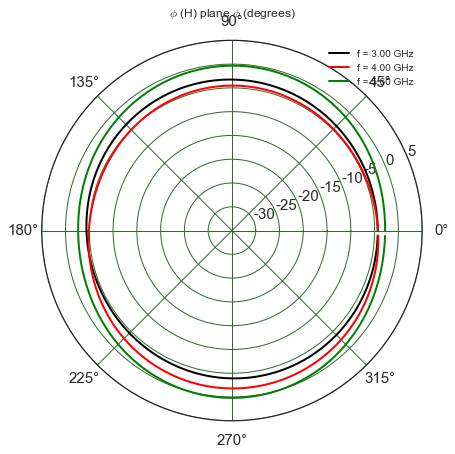

RuntimeError: rgrids only defined for polar axes

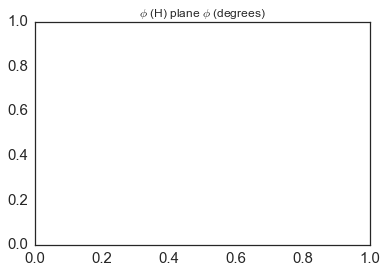

In [11]:
f = plt.figure(figsize=(15,15))
a1 = f.add_subplot(121,polar=True)
f1,a1 = A.plotG(fGHz=[3,4,5.6],phd=0,GmaxdB=5,fig=f,ax=a1)
a2 = f.add_subplot(122,polar=True)
f2,a2 = A.plotG(fGHz=[3,4,5.6],thd=90,GmaxdB=5,fig=f,ax=a2)
plt.tight_layout()

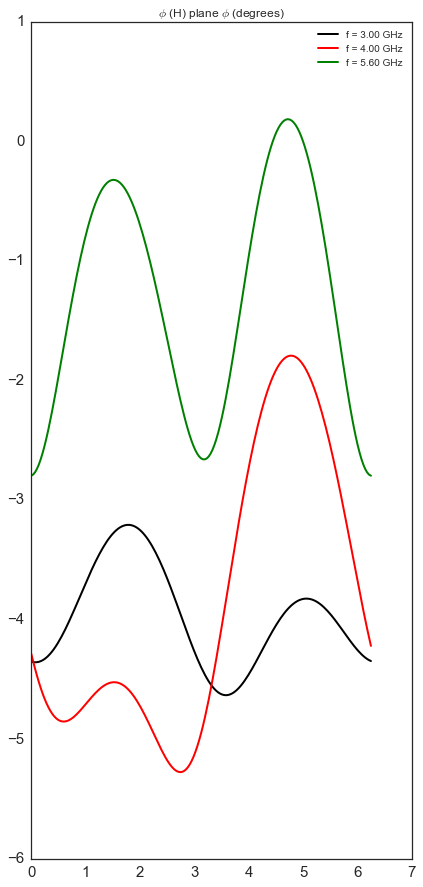

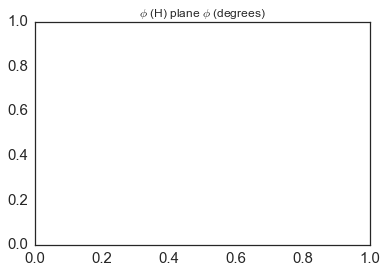

ValueError: max() arg is an empty sequence

In [12]:
f = plt.figure(figsize=(15,15))
a1 = f.add_subplot(121)
f1,a1 = A.plotG(fGHz=[3,4,5.6],phd=0,GmaxdB=5,fig=f,ax=a1,polar=False)
a2 = f.add_subplot(122)
f2,a2 = A.plotG(fGHz=[3,4,5.6],thd=90,GmaxdB=5,fig=f,ax=a2,polar=False)
plt.tight_layout()

In [10]:
A.fGHz[96]

5.6000000000000005

In [11]:
A.polar(fGHz=[5.6],phd=270,GmaxdB=5)

(<matplotlib.figure.Figure at 0x7fe1d43c5790>,
 <matplotlib.projections.polar.PolarAxes at 0x7fe1d3ed8c10>)

In [12]:
A.pol3d(R=5,St=8,Sp=8)

The vector spherical coefficients can be dispalayed as follows

In [13]:
fig = plt.figure(figsize=(8,8))
A.C.show(typ='s3')
plt.tight_layout()

## Defining Antenna gain from analytic formulas

An antenna can also be defined from closed-form expressions. Available antennas are the following
+ Omni
+ Gauss
+ WirePlate

In [13]:
A = Antenna(typ='Gauss')

In [14]:
A = Antenna('Gauss')